### Predicting Heart Disease from Clinical Attributes

This notebook uses the UCI Cleveland Heart Disease dataset to build and evaluate machine learning models that predict the presence of heart disease. We apply preprocessing, exploratory data analysis (EDA), classification models, hyperparameter tuning, and interpretability (SHAP).

Target: `num` (0 = no disease, >0 = heart disease)


In [2]:
# Import essential libraries for Machine Learning projects
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data file from the Windows path using WSL
# Change the Windows path to the mounted path in WSL (e.g., /mnt/e/)
data_path = '/mnt/e/Desktop/Data Science 2025/2- UCI Heart Disease Data/archive/heart_disease_uci.csv'
df = pd.read_csv(data_path)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
# Basic exploratory analysis of the DataFrame
df.info()  # General information and data types
print("\nStatistical summary:")
display(df.describe(include='all'))  # General descriptive statistics
print("\nNaN values per column:")
display(df.isna().sum())  # Count of NaN values
print("\nNumber of duplicated rows:", df.duplicated().sum())
print("\nFirst rows of the DataFrame:")
display(df.head())
print("\nLast rows of the DataFrame:")
display(df.tail())
print("\nDataFrame dimensions:", df.shape)
print("\nDataFrame columns:", df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

Statistical summary:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920,920,920,861.000000,890.000000,830,918,865.000000,865,858.000000,611,309.000000,434,920.000000
unique,NaN,NaN,2,4,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,NaN,Male,Cleveland,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,normal,NaN
freq,NaN,NaN,726,304,496,NaN,NaN,692,551,NaN,528,NaN,345,NaN,196,NaN
mean,460.500000,53.510870,NaN,NaN,NaN,132.132404,199.130337,NaN,NaN,137.545665,NaN,0.878788,NaN,0.676375,NaN,0.995652
std,265.725422,9.424685,NaN,NaN,NaN,19.066070,110.780810,NaN,NaN,25.926276,NaN,1.091226,NaN,0.935653,NaN,1.142693
min,1.000000,28.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,0.000000
25%,230.750000,47.000000,NaN,NaN,NaN,120.000000,175.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,460.500000,54.000000,NaN,NaN,NaN,130.000000,223.000000,NaN,NaN,140.000000,NaN,0.500000,NaN,0.000000,NaN,1.000000
75%,690.250000,60.000000,NaN,NaN,NaN,140.000000,268.000000,NaN,NaN,157.000000,NaN,1.500000,NaN,1.000000,NaN,2.000000



NaN values per column:


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


Number of duplicated rows: 0

First rows of the DataFrame:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0



Last rows of the DataFrame:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1



DataFrame dimensions: (920, 16)

DataFrame columns: ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


In [5]:
# Count zero values per column
(df == 0).sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      1
chol        172
fbs         692
restecg       0
thalch        0
exang       528
oldpeak     370
slope         0
ca          181
thal          0
num         411
dtype: int64

**Note:** To properly handle NaN and zero values, it is essential to understand the meaning of each column in the dataset:

- **id**: Unique id for each patient
- **age**: Age of the patient in years
- **origin**: Place of study
- **sex**: Male/Female
- **cp**: Chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
- **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital)
- **chol**: Serum cholesterol in mg/dl
- **fbs**: If fasting blood sugar > 120 mg/dl
- **restecg**: Resting electrocardiographic results ([normal, stt abnormality, lv hypertrophy])
- **thalach**: Maximum heart rate achieved
- **exang**: Exercise-induced angina (True/False)
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: The slope of the peak exercise ST segment
- **ca**: Number of major vessels (0-3) colored by fluoroscopy
- **thal**: [normal; fixed defect; reversible defect]
- **num**: The predicted attribute

Understanding these definitions helps determine whether NaN or zero values represent missing data, valid measurements, or specific clinical conditions.

To properly work with the boolean columns, we first need to inspect their unique values and convert them to integers (0 and 1) if necessary.

Step 1: Inspect the unique values to confirm how they are written:

```python
print(df["fbs"].unique())
print(df["exang"].unique())
```

In [6]:
# Inspect unique values of boolean columns before conversion
print(df["fbs"].unique())
print(df["exang"].unique())

[True False nan]
[False True nan]


✔️ Convert 0 → NaN only in variables where 0 is not clinically valid:

- **chol**

Certain variables contain zero values that are not clinically meaningful (e.g., cholesterol). These values were treated as missing data and replaced with NaN.

Binary variables such as fasting blood sugar (**fbs**) and exercise-induced angina (**exang**) were preserved, as zero represents a valid clinical category.

In [7]:
# Replace 0 values with NaN in the 'chol' column
df['chol'] = df['chol'].replace(0, np.nan)

In [8]:
# Count NaN and zero values per column
print('NaN values per column:')
print(df.isna().sum())

print('Zero values per column:')
print((df == 0).sum())

NaN values per column:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol        202
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
Zero values per column:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps      1
chol          0
fbs         692
restecg       0
thalch        0
exang       528
oldpeak     370
slope         0
ca          181
thal          0
num         411
dtype: int64


In [9]:
# Count NaN values per row and sort descending to analyze rows with most missing data
nan_per_row = df.isna().sum(axis=1)
nan_per_row_sorted = nan_per_row.sort_values(ascending=False)
nan_per_row_sorted

875    8
778    8
743    8
746    8
733    8
      ..
211    0
210    0
209    0
208    0
265    0
Length: 920, dtype: int64

In [10]:
# Show rows with up to 7 NaN values
rows_with_up_to_7_nan = nan_per_row[nan_per_row <= 7]
rows_with_up_to_7_nan_sorted = rows_with_up_to_7_nan.sort_values(ascending=False)
rows_with_up_to_7_nan_sorted

879    7
888    7
878    7
918    7
887    7
      ..
201    0
200    0
199    0
262    0
255    0
Length: 909, dtype: int64

Many rows (patients/IDs) in the dataset have a large amount of missing data—approximately 50% or more. To improve data quality and analysis reliability, we will identify and remove all rows with 7 or more NaN values. This helps ensure that only patients with sufficient information are included in the analysis.

In [11]:
# Calculate and display the number and percentage of patients with 7 or more NaN values
num_pacientes_7omas_nan = (nan_per_row >= 7).sum()
porcentaje_7omas_nan = num_pacientes_7omas_nan / 920 * 100
print(f"Number of patients with 7 or more NaN: {num_pacientes_7omas_nan}")
print(f"Percentage of total: {porcentaje_7omas_nan:.2f}%")

Number of patients with 7 or more NaN: 54
Percentage of total: 5.87%


After analyzing the dataset, we found that 54 patients (5.87% of the total) have 7 or more missing values (NaN) in their records. This percentage is not high and is generally considered acceptable for removal in data cleaning processes. Eliminating these rows will help improve the overall data quality and ensure more reliable analysis, as these patients have too much missing information to contribute meaningfully to the modeling.

### 🧪 Clinical justification for removing the variables `ca` and `thal`

During the initial exploration of the dataset, it was identified that the variables **`ca`** (number of major vessels observed by fluoroscopy) and **`thal`** (result of thallium stress test) have a very high percentage of missing values, exceeding 50%.

From a medical and analytical perspective:

* **`ca`** requires invasive or costly procedures (such as catheterization or fluoroscopy), which may explain its low availability. Additionally, since it is not present for most patients, its predictive value is limited by the low volume of data.

* **`thal`** is a categorical variable with multiple classes, also derived from specific studies. Imputing it without sufficient clinical support may introduce bias or distort the analysis.

🔍 For these reasons, **both variables were removed** from the analysis to preserve model quality and avoid decisions based on incomplete or unrepresentative data. This choice allows for retaining a larger number of patients for training without compromising the integrity of the study.

In [12]:
# Create df_clean from df, then remove 'ca' and 'thal' columns and show NaN percentage per column
df_clean = df.copy()
df_clean = df_clean.drop(['ca', 'thal'], axis=1)
nan_percent = df_clean.isna().sum() / len(df_clean) * 100
print("NaN values per column in df_clean (% of total):")
print(nan_percent.round(2))

NaN values per column in df_clean (% of total):
id           0.00
age          0.00
sex          0.00
dataset      0.00
cp           0.00
trestbps     6.41
chol        21.96
fbs          9.78
restecg      0.22
thalch       5.98
exang        5.98
oldpeak      6.74
slope       33.59
num          0.00
dtype: float64


markdown
markdown
To ensure data integrity and improve model performance, we applied different imputation strategies based on the nature and distribution of each clinical variable:

* **`chol` (serum cholesterol):** Imputed with the **median** due to a right-skewed distribution and the presence of outliers. Median is more robust than mean in such cases.

* **`fbs` (fasting blood sugar):** As a binary categorical variable, missing values were imputed using the **mode**, representing the most frequent clinical state.

* **`slope` (ST segment slope):** This is a categorical clinical feature. Missing values were replaced with a new category labeled **"unknown"** to retain this information and avoid data loss.

* **`trestbps` (resting blood pressure):** Imputed with the **median**, as this continuous variable may also contain outliers or skewed values.

* **`restecg` (resting ECG results):** A categorical feature with a limited number of possible values, thus imputed with the **mode**.

* **`thalach` (maximum heart rate):** A numerical variable related to exercise performance. Missing values were filled using the **median**.

* **`exang` (exercise-induced angina):** A boolean categorical variable, filled with the **mode** to preserve the most common clinical condition.

* **`oldpeak` (ST depression):** As a continuous numerical variable with potential skewness, missing values were filled using the **median**.

In [13]:
# Impute missing values according to clinical strategy (only for columns present in df_clean)
for col, strategy in {
    'chol': lambda x: x.fillna(x.median()),
    'fbs': lambda x: x.fillna(x.mode()[0]),
    'slope': lambda x: x.fillna('unknown'),
    'trestbps': lambda x: x.fillna(x.median()),
    'restecg': lambda x: x.fillna(x.mode()[0]),
    'exang': lambda x: x.fillna(x.mode()[0]),
    'oldpeak': lambda x: x.fillna(x.median()),
    'thalch': lambda x: x.fillna(x.mean())
}.items():
    if col in df_clean.columns:
        df_clean[col] = strategy(df_clean[col])

# Check remaining NaN values per column
print('Remaining NaN values per column:')
print(df_clean.isna().sum())

Remaining NaN values per column:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64


--- Statistical Summary for All Variables ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,920.0,NaN,NaN,NaN,460.5,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,NaN,NaN,NaN,53.51087,9.424685,28.0,47.0,54.0,60.0,77.0
sex,920,2,Male,726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dataset,920,4,Cleveland,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,920,4,asymptomatic,496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trestbps,920.0,NaN,NaN,NaN,131.995652,18.4513,0.0,120.0,130.0,140.0,200.0
chol,920.0,NaN,NaN,NaN,245.222826,51.785328,85.0,217.75,239.5,267.0,603.0
fbs,920,2,False,782,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,920,3,normal,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalch,920.0,NaN,NaN,NaN,137.545665,25.138494,60.0,120.0,138.0,156.0,202.0



--- Skewness and Kurtosis ---
id: Skewness = 0.00, Kurtosis = -1.20
age: Skewness = -0.20, Kurtosis = -0.39
trestbps: Skewness = 0.24, Kurtosis = 3.34
chol: Skewness = 1.57, Kurtosis = 7.03
thalch: Skewness = -0.22, Kurtosis = -0.32
oldpeak: Skewness = 1.13, Kurtosis = 1.45
num: Skewness = 0.97, Kurtosis = -0.11

--- Value Counts for Categorical Variables ---

sex value counts:
sex
Male      726
Female    194
Name: count, dtype: int64

dataset value counts:
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

cp value counts:
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

restecg value counts:
restecg
normal              553
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

slope value counts:
slope
flat           345
unknown        309
upsloping      203
downsloping     63
Name: count, dtype: int64

--- Distribution Plot

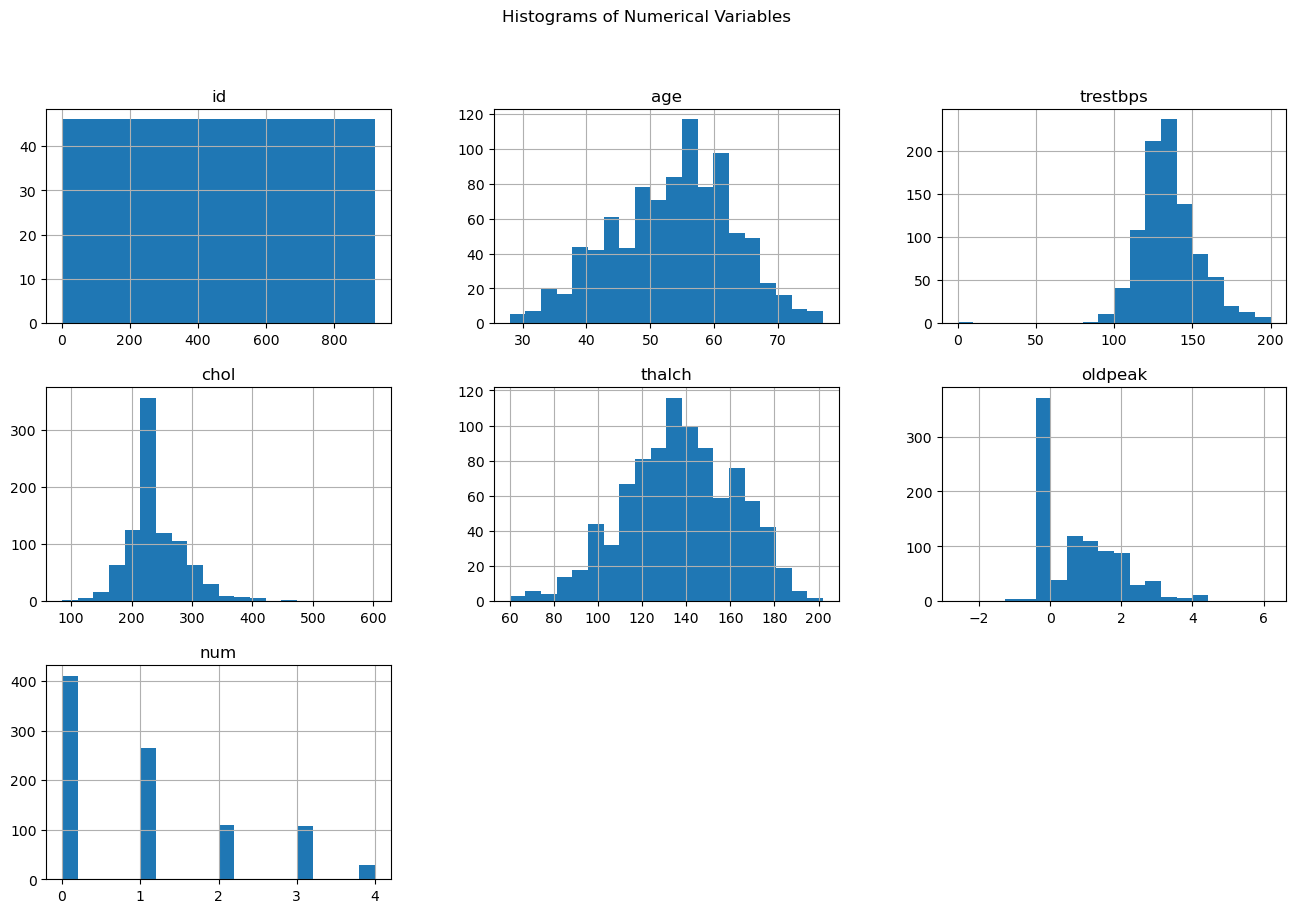

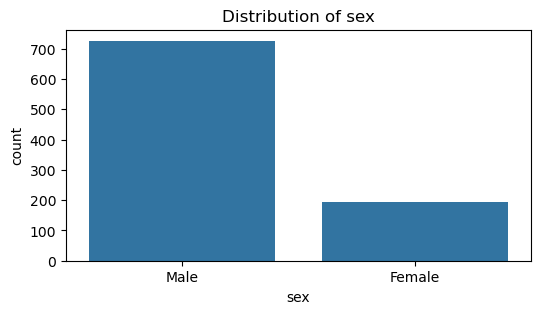

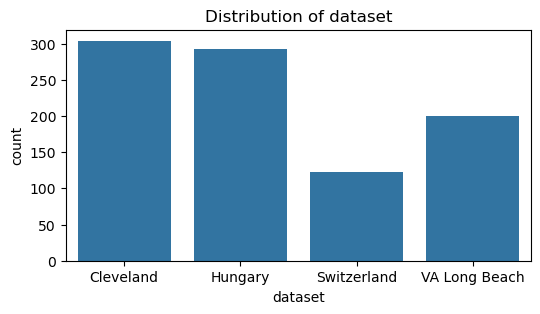

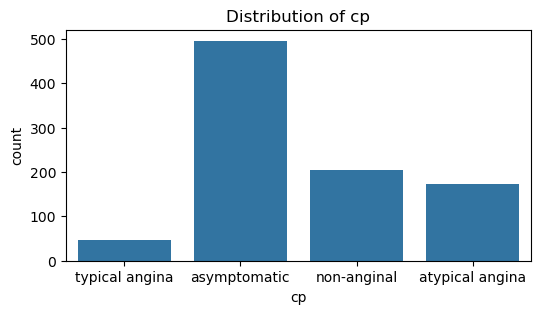

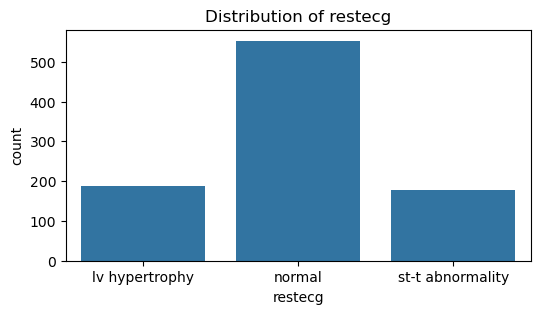

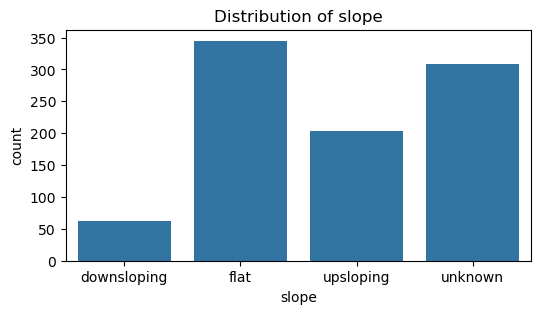

In [14]:
# Statistical analysis and final report of the cleaned dataset
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
print('--- Statistical Summary for All Variables ---')
display(df_clean.describe(include='all').transpose())
print('\n--- Skewness and Kurtosis ---')
for col in df_clean.select_dtypes(include=['float64', 'int64']).columns:
    print(f"{col}: Skewness = {skew(df_clean[col]):.2f}, Kurtosis = {kurtosis(df_clean[col]):.2f}")
print('\n--- Value Counts for Categorical Variables ---')
for col in df_clean.select_dtypes(include=['object', 'category']).columns:
    print(f"\n{col} value counts:")
    print(df_clean[col].value_counts())
print('\n--- Distribution Plots ---')
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
df_clean[num_cols].hist(figsize=(16, 10), bins=20)
plt.suptitle('Histograms of Numerical Variables')
plt.show()
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=df_clean)
    plt.title(f'Distribution of {col}')
    plt.show()

In [15]:
# Check for remaining NaN values per column before statistical analysis
print('Remaining NaN values per column in df_clean:')
print(df_clean.isna().sum())

Remaining NaN values per column in df_clean:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64


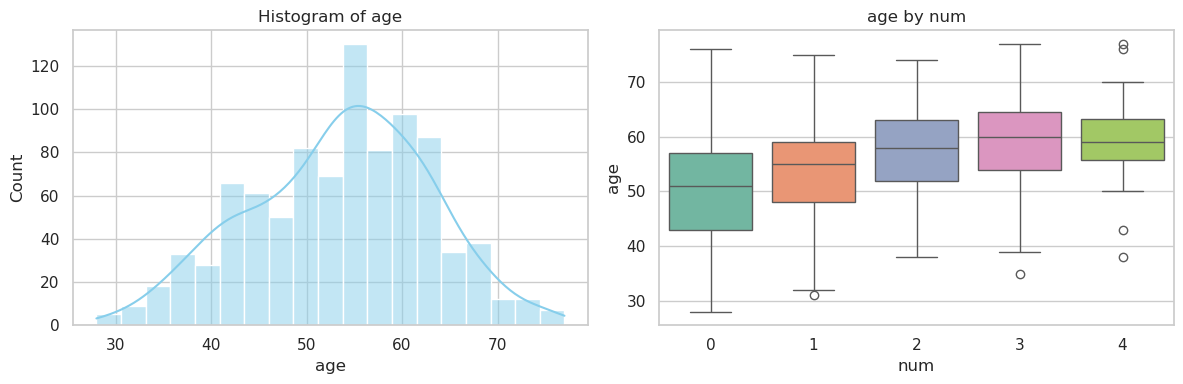

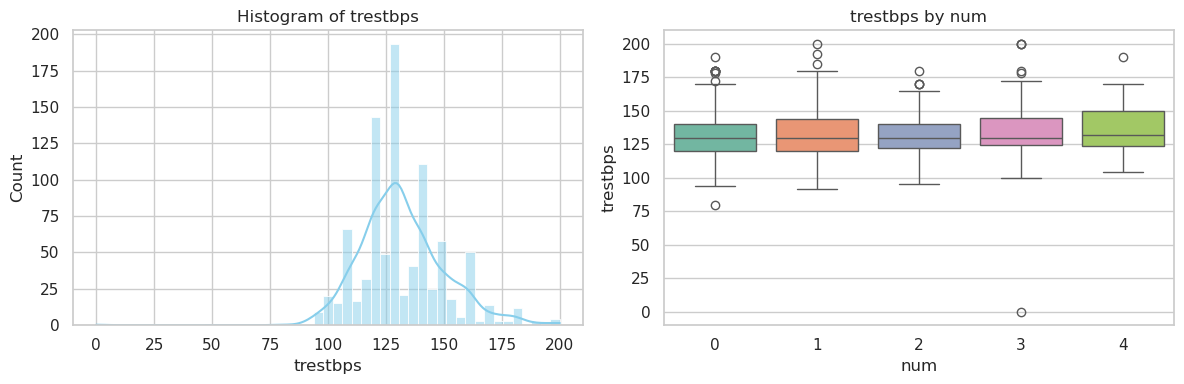

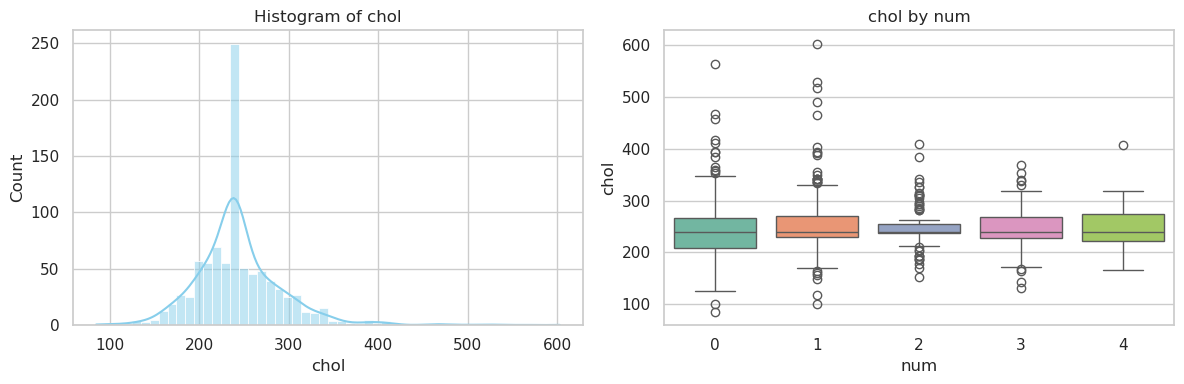

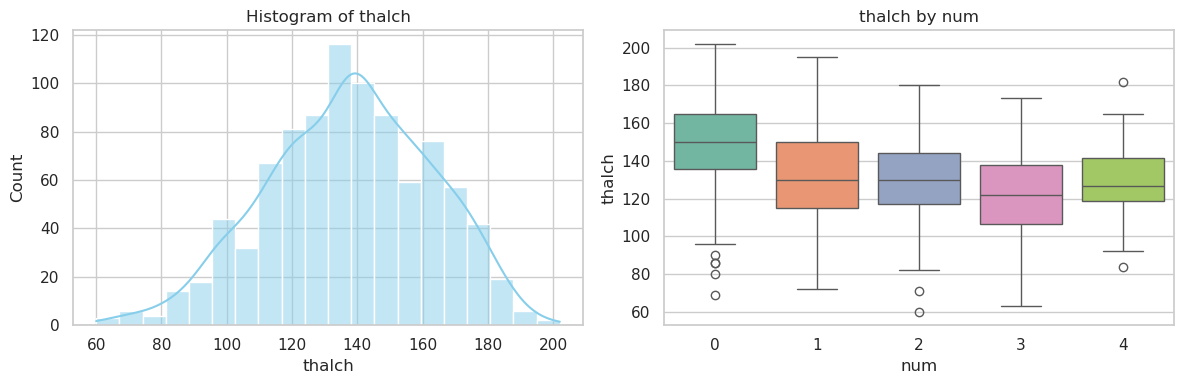

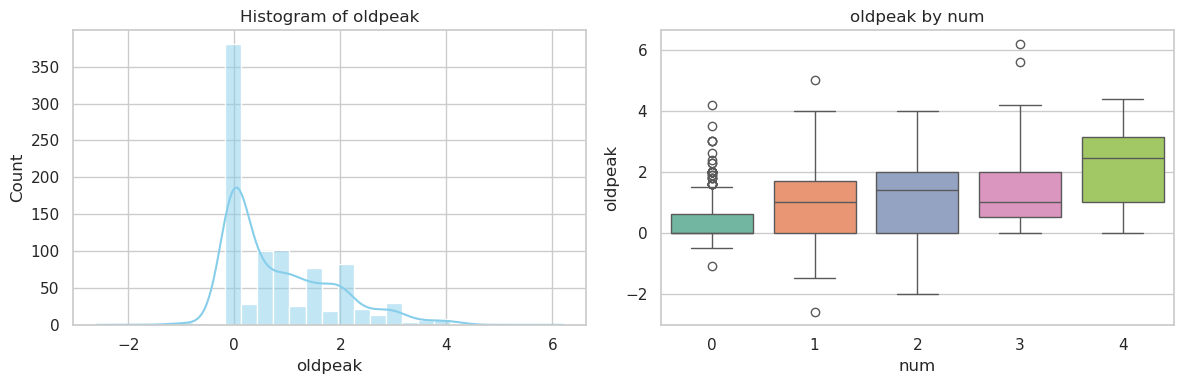

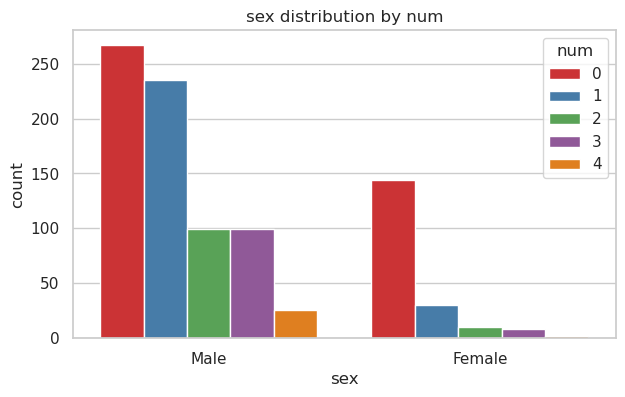

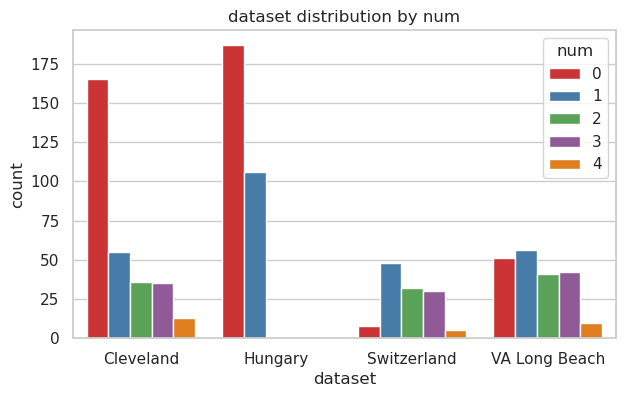

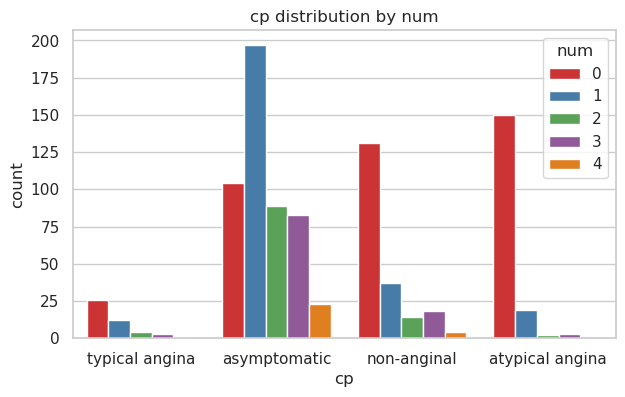

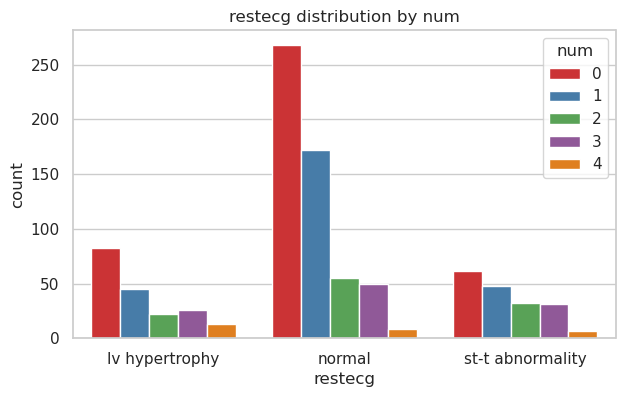

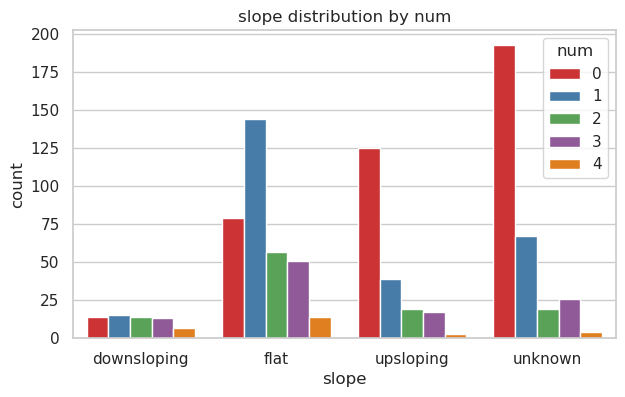

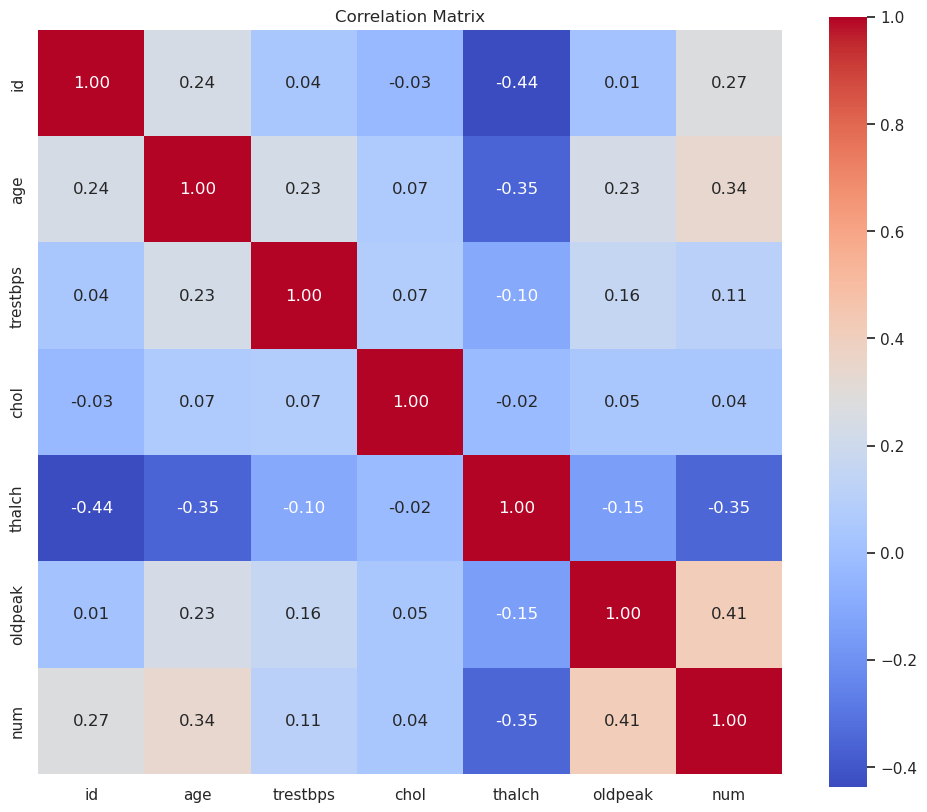

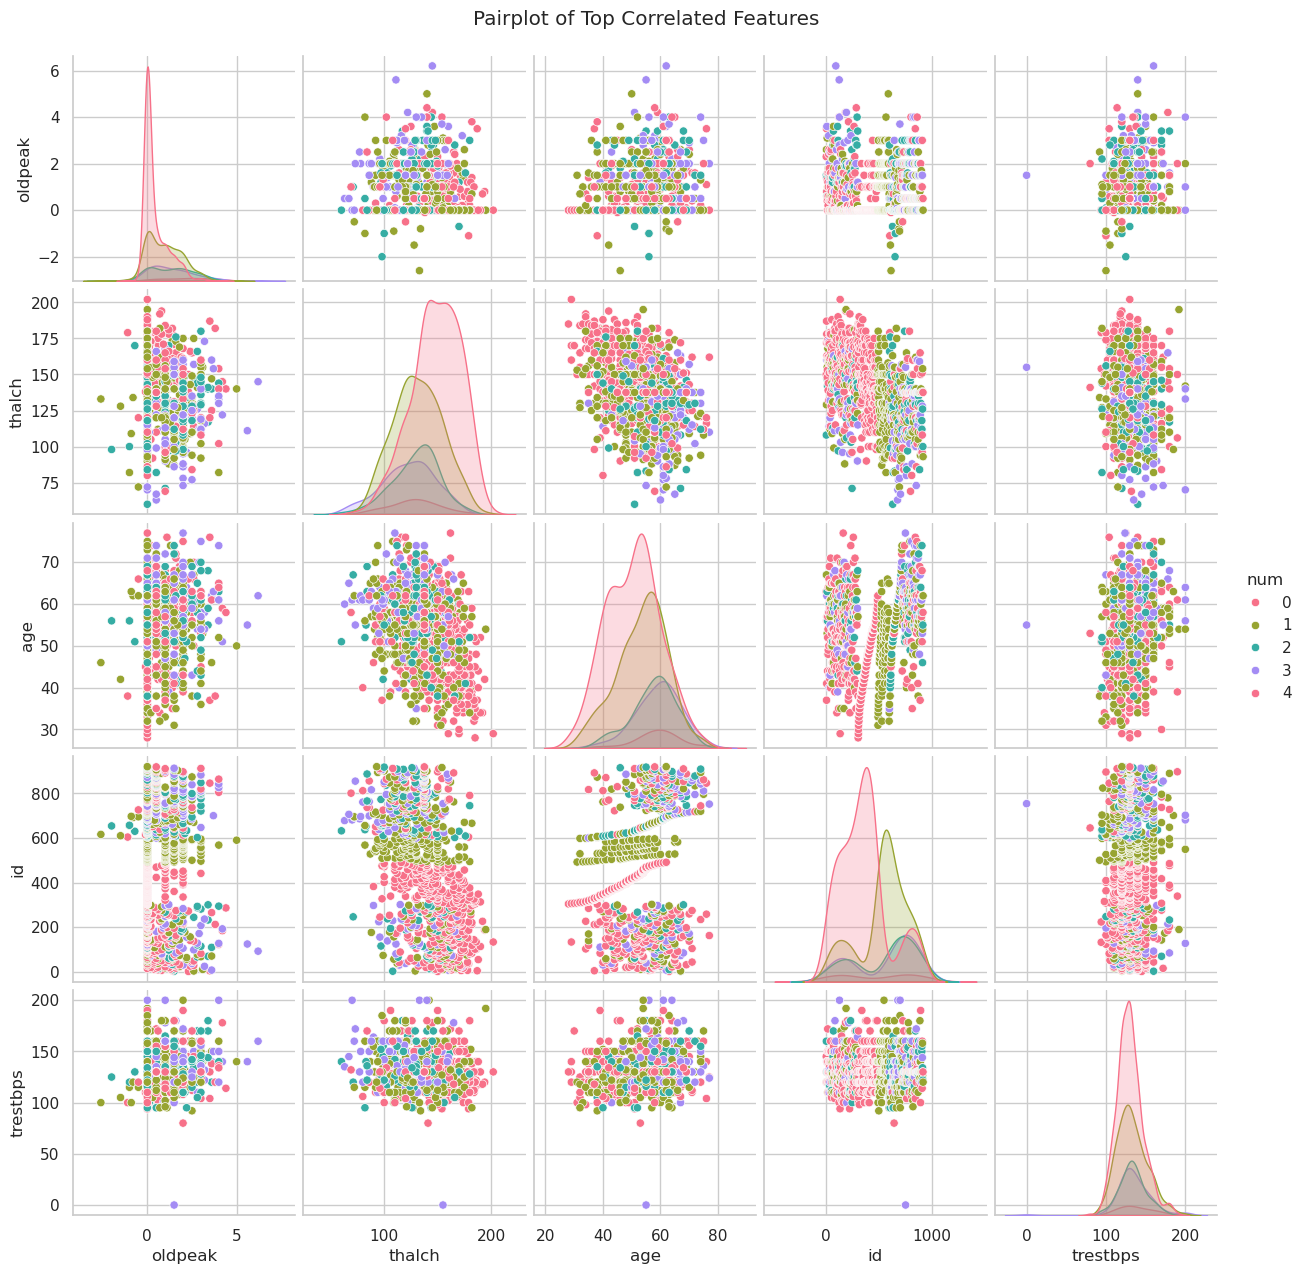

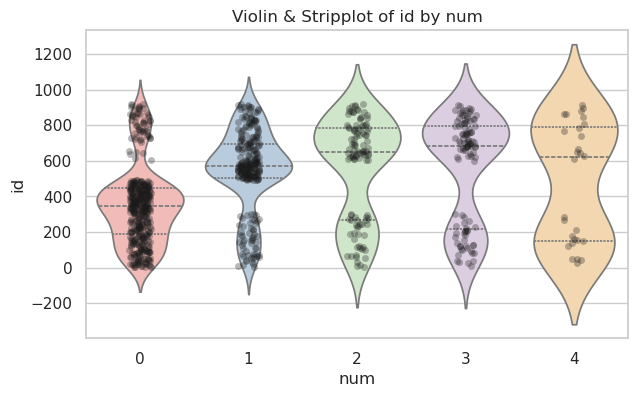

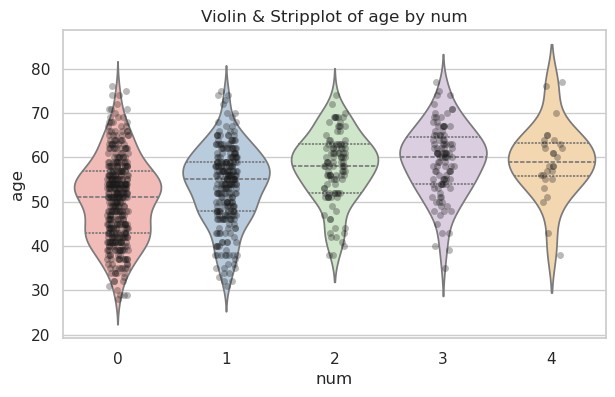

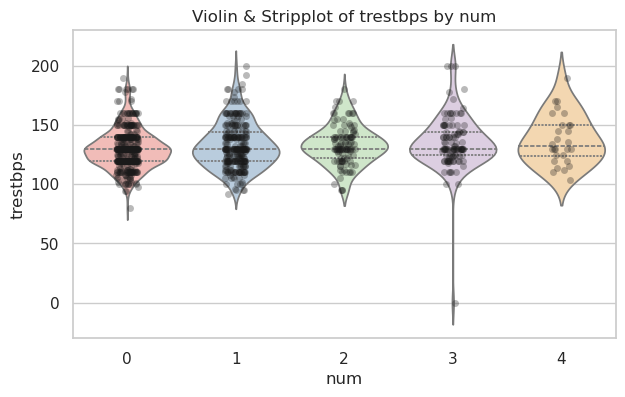

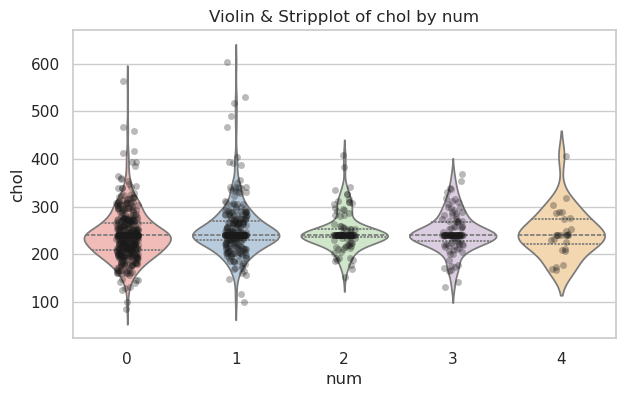

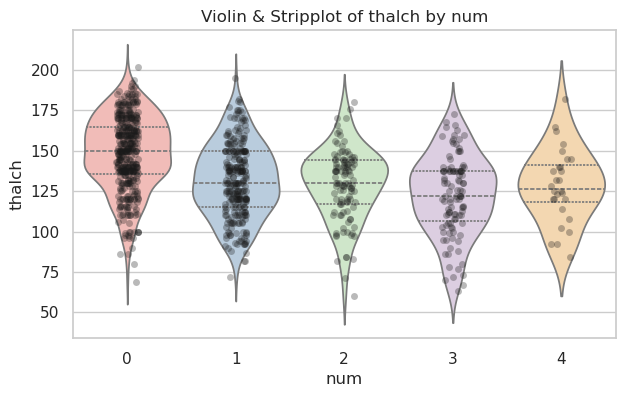

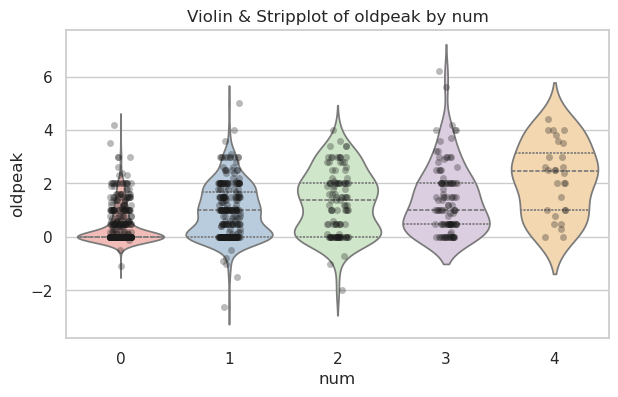

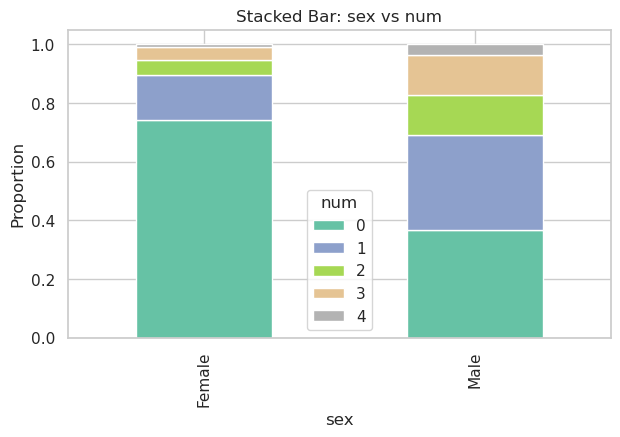

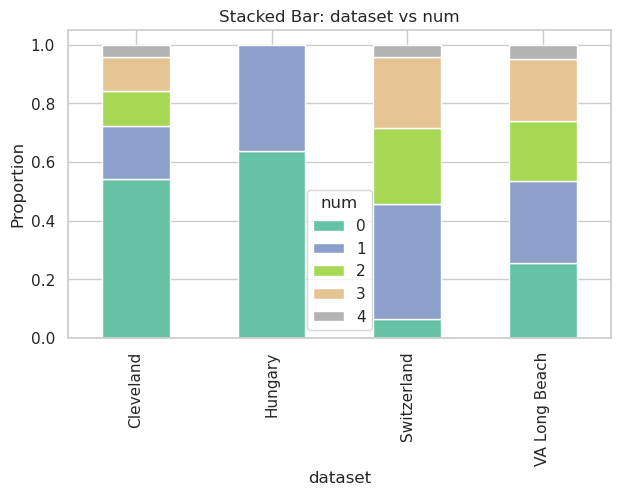

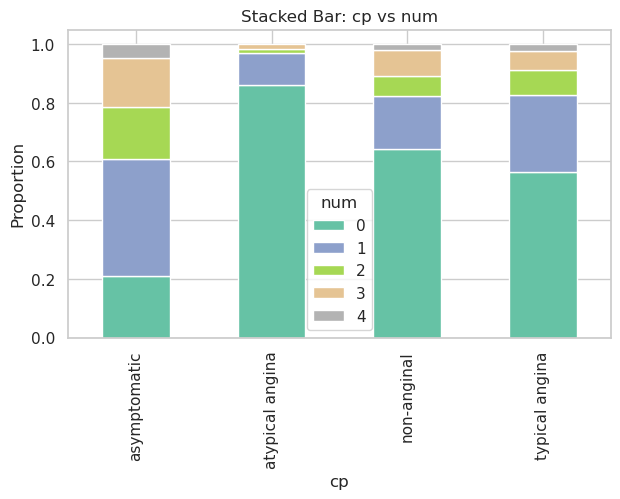

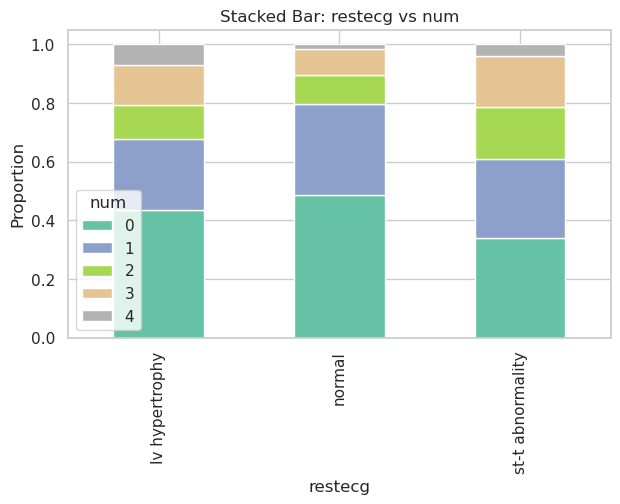

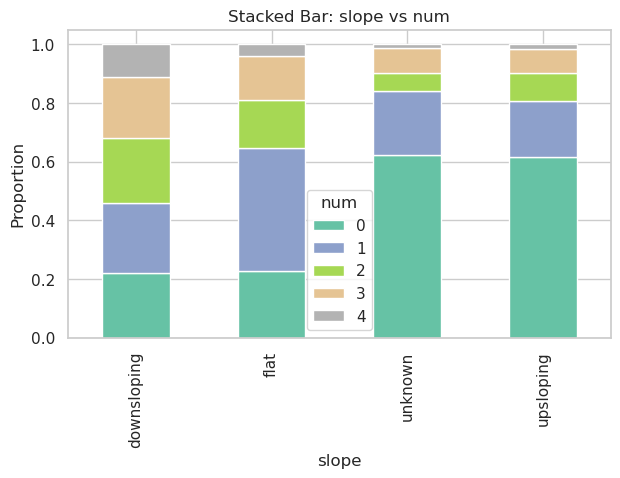

In [16]:
# Exploratory Data Analysis (EDA): Distribution and relationships with target variable
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
target = 'num'  # Variable objetivo
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.drop(target) if target in df_clean.columns else df_clean.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns
## 1. Histogramas y boxplots para variables numéricas (excepto 'id')
for col in num_cols.drop('id'):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df_clean[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Histogram of {col}')
    sns.boxplot(x=target, y=col, data=df_clean, ax=axes[1], palette='Set2')
    axes[1].set_title(f'{col} by {target}')
    plt.tight_layout()
    plt.show()
## 2. Countplots para variables categóricas
for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, hue=target, data=df_clean, palette='Set1')
    plt.title(f'{col} distribution by {target}')
    plt.legend(title=target)
    plt.show()
## 3. Matriz de correlación y mapa de calor
plt.figure(figsize=(12,10))
corr = df_clean.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()
## 4. Pairplot para variables numéricas más relevantes
top_corr = corr[target].abs().sort_values(ascending=False)[1:6].index.tolist() if target in corr else num_cols[:5]
sns.pairplot(df_clean, vars=top_corr, hue=target, palette='husl')
plt.suptitle('Pairplot of Top Correlated Features', y=1.02)
plt.show()
## 5. Gráficos adicionales: violinplots y stripplots para variables numéricas vs target
for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.violinplot(x=target, y=col, data=df_clean, inner='quartile', palette='Pastel1')
    sns.stripplot(x=target, y=col, data=df_clean, color='k', alpha=0.3)
    plt.title(f'Violin & Stripplot of {col} by {target}')
    plt.show()
## 6. Gráficos de barras apiladas para variables categóricas vs target
for col in cat_cols:
    ct = pd.crosstab(df_clean[col], df_clean[target], normalize='index')
    ct.plot(kind='bar', stacked=True, figsize=(7,4), colormap='Set2')
    plt.title(f'Stacked Bar: {col} vs {target}')
    plt.ylabel('Proportion')
    plt.legend(title=target)
    plt.show()

### 🩺 Detection and Handling of a Clinically Implausible Outlier in Resting Blood Pressure

During the exploratory analysis of **resting blood pressure (`trestbps`)**, a boxplot stratified by the target variable (`num`) revealed an **extreme outlier** in the group `num = 3`, with a value close to **0 mmHg**.

From a clinical perspective:


* A resting systolic blood pressure of **0 mmHg is physiologically impossible** and incompatible with life.
* This strongly suggests a **data entry or recording error**, rather than a true clinical observation.
* Retaining such a value could distort statistical summaries and negatively affect model training, especially for scale‑sensitive algorithms.


---


### 🛠️ Possible Strategies Considered


Two valid approaches were evaluated:


1. **Remove the entire patient record**  
   This option ensures complete removal of erroneous data but results in additional data loss, which may be undesirable given the already limited sample size.

2. **Impute the implausible value using the median of the variable**  
   This approach preserves the remaining clinically valid information from the patient while correcting the erroneous measurement.


---


### ✅ Final Decision


I **chose to impute the implausible `trestbps` value using the median** of the distribution.  
This decision was made to **retain as much valid patient information as possible**, while ensuring physiologically plausible values and maintaining dataset integrity.

The median was selected because it is **robust to outliers** and commonly used in clinical data preprocessing when distributions may be skewed.

In [17]:
# Imputar valores clínicamente implausibles de trestbps (< 50 mmHg) con la mediana
trestbps_median = df_clean.loc[df_clean['trestbps'] >= 50, 'trestbps'].median()
outlier_count = (df_clean['trestbps'] < 50).sum()
df_clean.loc[df_clean['trestbps'] < 50, 'trestbps'] = trestbps_median
print(f"Imputed {outlier_count} value(s) of trestbps<50 with the median: {trestbps_median}")

Imputed 1 value(s) of trestbps<50 with the median: 130.0


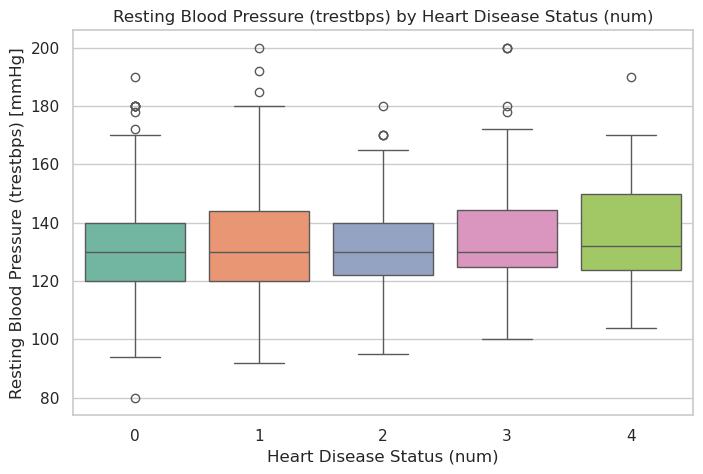

In [18]:
# Boxplot de trestbps vs num después de la imputación del outlier
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.boxplot(x='num', y='trestbps', data=df_clean, palette='Set2')
plt.title('Resting Blood Pressure (trestbps) by Heart Disease Status (num)')
plt.xlabel('Heart Disease Status (num)')
plt.ylabel('Resting Blood Pressure (trestbps) [mmHg]')
plt.show()

**Comment:**

After imputing the physiologically impossible outlier in `trestbps` for category `num = 3`, the boxplot no longer shows a value near 0 mmHg in this group. While other outliers remain present in the distribution, these values are still plausible from a clinical perspective and may represent rare but possible cases. The dataset now better reflects realistic patient measurements for further analysis and modeling.

### 🔄 Encoding Categorical Variables for Modeling

Before proceeding to machine learning modeling, it is essential to convert all categorical variables into numerical representations. This step ensures compatibility with most algorithms and allows the model to interpret clinical categories appropriately.

We will apply suitable encoding techniques (such as one-hot encoding or label encoding) to transform categorical features into numeric format, preserving the clinical meaning and maximizing predictive power.

In [19]:
# Identify categorical columns to encode before modeling
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
print('Categorical columns to encode:')
print(cat_cols)
for col in cat_cols:
    print(f'\nUnique values in {col}:')
    print(df_clean[col].unique())

Categorical columns to encode:
['sex', 'dataset', 'cp', 'restecg', 'slope']

Unique values in sex:
['Male' 'Female']

Unique values in dataset:
['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']

Unique values in cp:
['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']

Unique values in restecg:
['lv hypertrophy' 'normal' 'st-t abnormality']

Unique values in slope:
['downsloping' 'flat' 'upsloping' 'unknown']


### 🧠 Categorical Variable Encoding: Rationale and Decisions

Before training machine learning models, categorical variables must be converted to numerical values. Here is a summary of the planned encoding strategies for each variable:

🔸 **sex (Sex)**
- Values: Male, Female
- Type: Binary
- **Encoding:** Map to 1 (Male) and 0 (Female) using `map()`.
- **Reason:** Simple binary variable representing biological sex.

🔸 **dataset (Study Center)**
- Values: Cleveland, Hungary, Switzerland, VA Long Beach
- Type: Nominal categorical
- **Encoding:** Will be removed, as it is not expected to add predictive value. (Can be reconsidered later.)

🔸 **cp (Chest Pain Type)**
- Values: typical angina, atypical angina, non-anginal, asymptomatic
- Type: Categorical with 4 classes
- **Encoding:** One-Hot Encoding
- **Reason:** Differentiating pain types is clinically relevant for heart disease diagnosis.

🔸 **restecg (Resting ECG)**
- Values: normal, st-t abnormality, lv hypertrophy
- Type: Ordinal categorical
- **Encoding:** One-Hot Encoding
- **Reason:** Although there is some clinical order, one-hot encoding avoids assuming linear relationships.

🔸 **slope (ST Segment Slope)**
- Values: upsloping, flat, downsloping, unknown
- Type: Categorical (including "unknown")
- **Encoding:** One-Hot Encoding, including the "unknown" category.
- **Reason:** Keeping "unknown" allows the model to learn if missingness is diagnostically informative.

In [20]:
# Apply categorical variable encoding as described above
df_encoded = df_clean.copy()

# 1. Encode 'sex' (Male=1, Female=0)
df_encoded['sex'] = df_encoded['sex'].map({'Male': 1, 'Female': 0})

# 2. Remove 'dataset' column (not used for modeling)
if 'dataset' in df_encoded.columns:
    df_encoded = df_encoded.drop('dataset', axis=1)

# 3. One-Hot Encode 'cp', 'restecg', 'slope' (including 'unknown')
categorical_to_onehot = ['cp', 'restecg', 'slope']
df_encoded = pd.get_dummies(df_encoded, columns=categorical_to_onehot, drop_first=False)

# Display the first rows of the encoded DataFrame
df_encoded.head()

,id,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,...,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_unknown,slope_upsloping
0,1,63,1,145.0,233.0,True,150.0,False,2.3,0,...,False,False,True,True,False,False,True,False,False,False
1,2,67,1,160.0,286.0,False,108.0,True,1.5,2,...,False,False,False,True,False,False,False,True,False,False
2,3,67,1,120.0,229.0,False,129.0,True,2.6,1,...,False,False,False,True,False,False,False,True,False,False
3,4,37,1,130.0,250.0,False,187.0,False,3.5,0,...,False,True,False,False,True,False,True,False,False,False
4,5,41,0,130.0,204.0,False,172.0,False,1.4,0,...,True,False,False,True,False,False,False,False,False,True


In [21]:
# Check that all columns in df_encoded are now numeric (no object or category types)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        920 non-null    int64  
 1   age                       920 non-null    int64  
 2   sex                       920 non-null    int64  
 3   trestbps                  920 non-null    float64
 4   chol                      920 non-null    float64
 5   fbs                       920 non-null    bool   
 6   thalch                    920 non-null    float64
 7   exang                     920 non-null    bool   
 8   oldpeak                   920 non-null    float64
 9   num                       920 non-null    int64  
 10  cp_asymptomatic           920 non-null    bool   
 11  cp_atypical angina        920 non-null    bool   
 12  cp_non-anginal            920 non-null    bool   
 13  cp_typical angina         920 non-null    bool   
 14  restecg_lv

In [22]:
# Convert boolean columns to integers and remove 'id' column
for col in ['fbs', 'exang']:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)
if 'id' in df_encoded.columns:
    df_encoded = df_encoded.drop('id', axis=1)
# Display the first rows of the updated DataFrame
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_unknown,slope_upsloping
0,63,1,145.0,233.0,1,150.0,0,2.3,0,False,False,False,True,True,False,False,True,False,False,False
1,67,1,160.0,286.0,0,108.0,1,1.5,2,True,False,False,False,True,False,False,False,True,False,False
2,67,1,120.0,229.0,0,129.0,1,2.6,1,True,False,False,False,True,False,False,False,True,False,False
3,37,1,130.0,250.0,0,187.0,0,3.5,0,False,False,True,False,False,True,False,True,False,False,False
4,41,0,130.0,204.0,0,172.0,0,1.4,0,False,True,False,False,True,False,False,False,False,False,True


### ✅ Final Variable Conversion and Modeling Preparation Summary

In this final preprocessing stage:

1. **Boolean Variable Conversion:**
   - The variables `fbs` (fasting blood sugar) and `exang` (exercise-induced angina) were originally boolean (`True/False`).
   - For compatibility with machine learning models, they were converted to integer values (`0` and `1`), allowing algorithms to interpret them numerically.

2. **Removal of the `id` Column:**
   - The `id` column is a unique identifier for each patient, with no clinical or predictive value.
   - It was removed to prevent the model from learning irrelevant patterns or numerical artifacts during training.

With these transformations, the dataset is now fully clean and ready for the next stage: **modeling**.

In [23]:
# Check that all columns in df_encoded are now numeric (no object or category types)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   sex                       920 non-null    int64  
 2   trestbps                  920 non-null    float64
 3   chol                      920 non-null    float64
 4   fbs                       920 non-null    int64  
 5   thalch                    920 non-null    float64
 6   exang                     920 non-null    int64  
 7   oldpeak                   920 non-null    float64
 8   num                       920 non-null    int64  
 9   cp_asymptomatic           920 non-null    bool   
 10  cp_atypical angina        920 non-null    bool   
 11  cp_non-anginal            920 non-null    bool   
 12  cp_typical angina         920 non-null    bool   
 13  restecg_lv hypertrophy    920 non-null    bool   
 14  restecg_no

### Scaling Numerical Variables with RobustScaler

Many machine learning algorithms are sensitive to the scale of input features, especially when variables have different units or ranges. In this dataset, the four continuous numerical variables—`trestbps` (resting blood pressure), `chol` (serum cholesterol), `thalach` (maximum heart rate), and `oldpeak` (ST depression)—contain outliers or are not normally distributed.

**Why RobustScaler?**
- The RobustScaler is designed to reduce the influence of outliers by scaling features according to the interquartile range (IQR), rather than the mean and standard deviation.
- This makes it more robust to extreme values, ensuring that the majority of the data is scaled appropriately while minimizing the impact of outliers.
- It is especially suitable for clinical data, where rare but valid extreme values may exist.

**Decision:**
I will use the RobustScaler from scikit-learn to scale the four continuous variables with outliers: `age`, `trestbps`, `chol`, `thalch`, and `oldpeak`. This will help improve model performance and ensure that all features contribute equally to the learning process.

In [24]:
# Apply RobustScaler to the four continuous variables with outliers
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_encoded[['trestbps', 'chol','age', 'thalch', 'oldpeak']] = scaler.fit_transform(df_encoded[['trestbps', 'chol', 'age','thalch', 'oldpeak']])
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_unknown,slope_upsloping
0,0.692308,1,0.75,-0.131980,1,0.333333,0,1.200000,0,False,False,False,True,True,False,False,True,False,False,False
1,1.000000,1,1.50,0.944162,0,-0.833333,1,0.666667,2,True,False,False,False,True,False,False,False,True,False,False
2,1.000000,1,-0.50,-0.213198,0,-0.250000,1,1.400000,1,True,False,False,False,True,False,False,False,True,False,False
3,-1.307692,1,0.00,0.213198,0,1.361111,0,2.000000,0,False,False,True,False,False,True,False,True,False,False,False
4,-1.000000,0,0.00,-0.720812,0,0.944444,0,0.600000,0,False,True,False,False,True,False,False,False,False,False,True


### 4. Class Balance Analysis (Target Variable: num)

Before proceeding with modeling, it is important to analyze the balance of the target variable (`num`). Class imbalance can negatively affect the performance of machine learning models, especially in classification tasks, as models may become biased toward the majority class.
```
This plot will help visualize the distribution of the target classes and determine if any balancing techniques are needed before training the models.

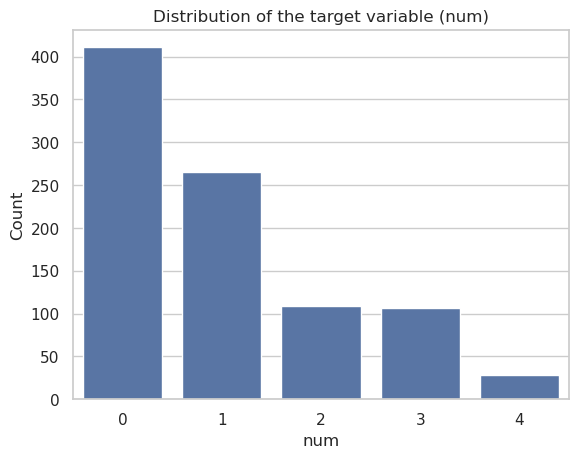

In [25]:
# Analyze the balance of the target variable 'num'
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='num', data=df_encoded)
plt.title("Distribution of the target variable (num)")
plt.xlabel('num')
plt.ylabel('Count')
plt.show()

## Class Balancing Analysis

Upon analyzing the distribution of the target variable (`num`), we observe a clear class imbalance: most patients are in class 0 (no disease), while classes 1 to 4 (different levels of heart disease) have progressively fewer cases.

### 🔍 Clinical and Technical Options

From both clinical and machine learning perspectives, a common strategy is to **binarize** the `num` variable, transforming the problem into binary classification:

- 0 → No disease
- 1 → Presence of disease (any degree)

This transformation simplifies the problem, improves interpretability, and is clinically relevant, as diagnosis often boils down to:
> *Does the patient have heart disease or not?*

However, for this exercise, we decided to **retain the original five classes (0 to 4)** to:

- Evaluate the model's predictive ability across all severity levels.
- Analyze clinical patterns associated with different degrees of disease.
- Explore whether the model can distinguish between mild, moderate, and severe risk.

### ⚠️ The Challenge of Multiclass Imbalance

Maintaining multiple imbalanced classes presents technical challenges:

- Models tend to favor majority classes (in this case, class 0).
- Global metrics like "accuracy" can be misleading.
- The model may perform poorly on underrepresented classes (e.g., class 4).

### ✅ Solution: Balancing with SMOTE

To address this, we applied **SMOTE (Synthetic Minority Over-sampling Technique)** exclusively to the training set. SMOTE generates synthetic samples for minority classes, allowing the model to better learn their patterns without losing real data.

SMOTE features:

- Does not remove real data (unlike undersampling).
- Does not simply duplicate data (unlike traditional oversampling).
- Preserves the overall clinical distribution of the dataset.

📌 Importantly, balancing was performed **only on the training set** to avoid test contamination and ensure honest evaluation.

### 🩺 Clinical Implications

This approach allows us to:

- Assess whether a model can distinguish not only between disease and no disease, but also between different levels of cardiovascular risk.
- Analyze which clinical variables are associated with more severe disease.
- Develop a more nuanced classification approach, useful for clinical prioritization or automated triage.

---

🔚 In summary, while binarizing the target would be a valid and clinically useful option, we chose to address the multiclass problem and apply appropriate balancing techniques to ensure fair model evaluation across all disease levels.

🧪 **When to Apply SMOTE?**

You should apply SMOTE **after splitting the dataset into training and test sets**, and only to the training set.

✅ **Why?**

- **Avoid data leakage:**
  If you apply SMOTE before splitting, you generate synthetic data based on information from the test set, contaminating your evaluation. The model would "see" patterns from the test data during training.

- **Realistic evaluation:**
  The test set should reflect the real-world distribution of the problem, including its imbalance, because in practice, models are deployed on imbalanced data.

### Splitting the Dataset into Training and Test Sets

To properly evaluate our machine learning models, we will split the dataset into two parts: a **training set** and a **test set**.

- The **training set** will be used to train the models and apply techniques such as SMOTE for class balancing.
- The **test set** will remain untouched during training and balancing, providing an unbiased evaluation of model performance.

This approach ensures that our results are realistic and generalizable to new, unseen data.

In [26]:
# Split the dataset into training and test sets (80% train, 20% test) and apply SMOTE to the training set only
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separate features and target variable
y = df_encoded['num']
X = df_encoded.drop('num', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE only to the training set
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 1. Confirm the size of each set
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Balanced training set size: {X_train_bal.shape[0]}")

# 2. Confirm new class balance
print("Original y_train distribution:\n", y_train.value_counts())
print("Balanced y_train (SMOTE) distribution:\n", y_train_bal.value_counts())

Training set size: 736
Test set size: 184
Balanced training set size: 1645
Original y_train distribution:
 num
0    329
1    212
2     87
3     86
4     22
Name: count, dtype: int64
Balanced y_train (SMOTE) distribution:
 num
3    329
0    329
2    329
1    329
4    329
Name: count, dtype: int64
